# TASK 3: Classification Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

The digits dataset includes thousands of handwritten images. 

In [3]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


In [6]:
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


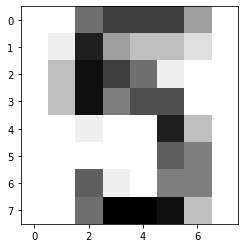

In [7]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Creating the model

We will use KNN classifier as the classification technique for the digits dataset. The KNN classifier will use 7 neighbours. We will define the feature and target arrays as X and y. The dataset will be split into test and training, then the classifier will be fit to the training dataset.

In [17]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

We will assess the predicted digits with expected digits.

In [19]:
predicted = knn.predict(X_test)
expected = y_test

print(f'The predicted digits for the first 15 samples: {predicted[:15]}\n')
print(f'The expected digits for the first 15 samples: {expected[:15]}\n')

The predicted digits for the first 15 samples: [5 2 8 1 7 2 6 2 6 5 0 5 9 3 4]

The expected digits for the first 15 samples: [5 2 8 1 7 2 6 2 6 5 0 5 9 3 4]



In [21]:
#Accuracy score
print(knn.score(X_test,y_test))

0.9833333333333333


We can see that the KNN classifer model provides an accuracy of 98% when we use 7 neighbours.

We will test and compare the accuracies from the training and testing sets. 

In [10]:
#Arrays for training and testing accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

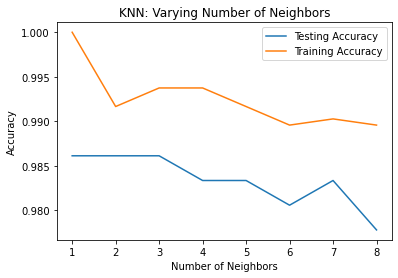

In [11]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a KNN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

According to the graph above, the highest accuracy occurs when using 3 and 4 neighbours - anything higher than that diminishes the accuracy score.

## How you tuned it

In [12]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=knn, X=digits.data,y=digits.target, cv=kfold)

print(f'Scores: \n {scores}\n')
print(f'Mean accuracy: \n{scores.mean():.2%}\n')
print(f'Accuracy standard deviation: \n{((scores.std())* 100):.2%}')

Scores: 
 [0.97222222 0.99444444 0.97222222 0.97777778 0.98333333 0.99444444
 0.97777778 0.98882682 1.         0.97765363]

Mean accuracy: 
98.39%

Accuracy standard deviation: 
94.49%


In [13]:
#Hyperparameter tuning
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


## How you verified it

We will create a confusion matrix to test how well the network performs on different categories and evaluate the accuracy of the classification. We will run samples through the network using the evaluate() function, which is the same as the train() function without the backpropagation. 

In [30]:
#using classification report and confusion matrix
print(f'{knn.score(X_test, y_test):.2%}\n')

from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(expected, predicted)
print(f'The confusion matrix: \n{confusion}\n\n')

print(f'Classification Report: \n{classification_report(expected, predicted)}')

98.33%

The confusion matrix: 
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 32  0]
 [ 0  0  0  0  1  0  0  0  1 34]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

    accuracy    

<AxesSubplot:>

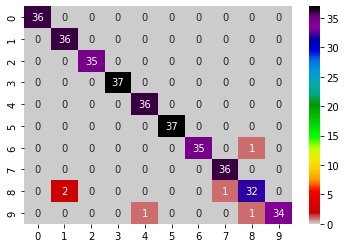

In [31]:
sns.heatmap(confusion, annot=True, cmap='nipy_spectral_r')

According to the dark coloured spots on the main axis, it shows the numbers the model guesses correctly. For example, it seems to pick up 5 and 3 quite well, but less so for 9. 

## Further test for rfc

In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=rfc,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

In [ ]:
print("Best k solutions")
evolved_estimator.hof

In [ ]:
sns.heatmap(confusion, annot=True, cmap='nipy_spectral_r')

In [ ]:
print("Accuracy: {}%".format(accuracy_score(y_test, predictions_rfc)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, predictions_rfc)))